<a href="https://colab.research.google.com/github/cauancalmeida/Challenge_1/blob/main/Analise_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sn


In [5]:
df = requests.get('https://raw.githubusercontent.com/cauancalmeida/Challenge_1/refs/heads/main/Alura-Voz-limpo.json')
df = pd.read_json(df.text)
df

<ipython-input-5-abf6cef9616a>:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(df.text)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [6]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


variavel Churn não foi retornada, farei um dtypes para entender

In [17]:
df.rename(columns={'phone.PhoneService':'phone_PhoneService','phone.MultipleLines':'phone_MultipleLines','internet.InternetService':'internet_InternetService',
                   'account.Contract':'account_Contract',
                  'account.PaperlessBilling':'account_PaperlessBilling','account.PaymentMethod':'account_PaymentMethod',
                  'account.Charges.Monthly':'account_Charges_Monthly','account.Charges.Total':'account_Charges_Total'},inplace=True)
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'phone_PhoneService', 'phone_MultipleLines',
       'internet_InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [18]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


neste caso, basta incluir um metodo include no descibe

In [19]:
df.describe(include='object')

,customerID,Churn,gender,Partner,Dependents,phone_PhoneService,phone_MultipleLines,internet_InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


ainda esta um pouco complicado, passarei para abordagem grafica

In [20]:
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


#Analise grafica

<BarContainer object of 2 artists>

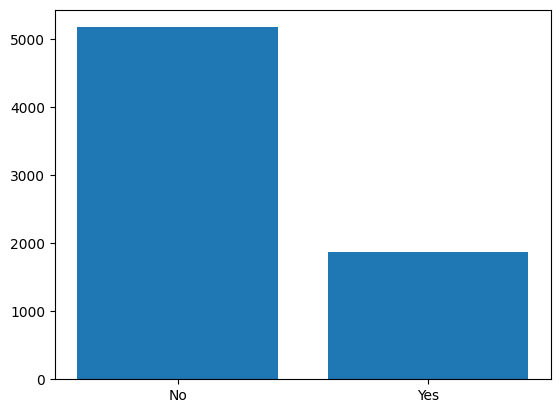

In [21]:
plt.bar(df.Churn.unique(),df.Churn.value_counts())

vamos dar uma olhada melhor nestes dados de Churn "sim"

In [22]:
df.query('Churn == "Yes"')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Credit card (automatic),62.70,2791.50
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.10,25.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,9961-JBNMK,Yes,Male,1,No,No,21,Yes,No,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),96.80,2030.30
7023,9965-YOKZB,Yes,Male,1,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.85,790.15
7036,9985-MWVIX,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15
7037,9986-BONCE,Yes,Female,0,No,No,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50


Text(0.5, 1.0, 'account_PaperlessBilling')

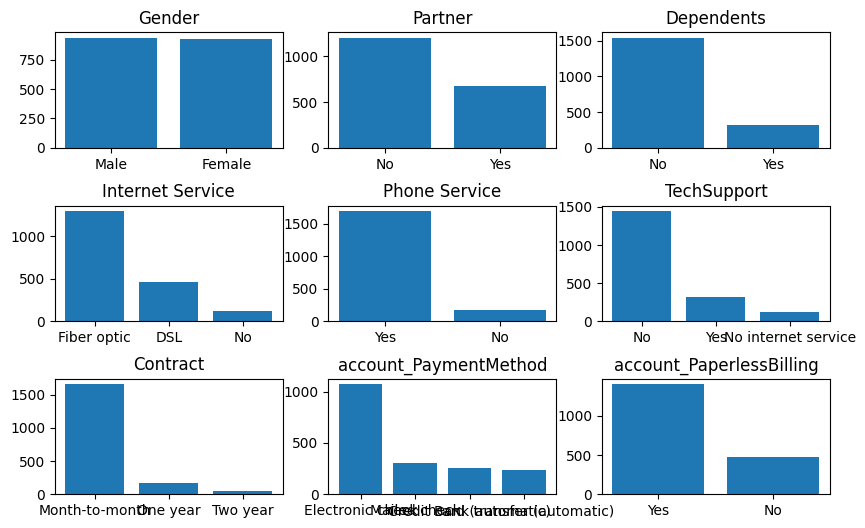

In [39]:
fig, axs = plt.subplots(3,3, figsize=(10,6))
fig.subplots_adjust(hspace=0.5)
#-----------Genero ---------------------
axs[0,0].bar(df.query('Churn == "Yes"').gender.unique(), df.query('Churn == "Yes"').gender.value_counts())
axs[0,0].set_title('Gender')
#-----------Partner ---------------------
axs[0,1].bar(df.query('Churn == "Yes"').Partner.unique(), df.query('Churn == "Yes"').Partner.value_counts())
axs[0,1].set_title('Partner')
#-----------Dependents ---------------------
axs[0,2].bar(df.query('Churn == "Yes"').Dependents.unique(), df.query('Churn == "Yes"').Dependents.value_counts())
axs[0,2].set_title('Dependents')


#-----------Internet -------------------
axs[1,0].bar(df.query('Churn == "Yes"').internet_InternetService.unique(),df.query('Churn == "Yes"').internet_InternetService.value_counts())
axs[1,0].set_title('Internet Service')
#-----------Phone Service----------------
axs[1,1].bar(df.query('Churn == "Yes"').phone_PhoneService.unique(),df.query('Churn == "Yes"').phone_PhoneService.value_counts())
axs[1,1].set_title('Phone Service')
#----------TechSupport----------------
axs[1,2].bar(df.query('Churn == "Yes"').TechSupport.unique(),df.query('Churn == "Yes"').TechSupport.value_counts())
axs[1,2].set_title('TechSupport')


#-----------Contrato--------------------
axs[2,0].bar(df.query('Churn == "Yes"').account_Contract.unique(),df.query('Churn == "Yes"').account_Contract.value_counts())
axs[2,0].set_title('Contract')

#-----------account_PaymentMethod--------------------
axs[2,1].bar(df.query('Churn == "Yes"').account_PaymentMethod.unique(),df.query('Churn == "Yes"').account_PaymentMethod.value_counts())
axs[2,1].set_title('account_PaymentMethod')


#-----------account_PaperlessBilling--------------------
axs[2,2].bar(df.query('Churn == "Yes"').account_PaperlessBilling.unique(),df.query('Churn == "Yes"').account_PaperlessBilling.value_counts())
axs[2,2].set_title('account_PaperlessBilling')
